In [2]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [3]:
def is_number(s):
    pattern = r'^-?\d+(\.\d+)?([eE][+-]?\d+)?$'
    return bool(re.match(pattern, s))
    
def parse_proj_4_string(proj_4_string):
    pairs = proj_4_string.split()
    proj_dict = {}
    for pair in pairs:
        token = pair.lstrip("+")
        if '=' in token:
            key, value = token.split("=")
            if is_number(value):
                value = float(value)
            proj_dict[key] = value
    return proj_dict

In [5]:
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/mywavewam800n/MyWave_wam800_c1WAVE00.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 3GB
Dimensions:                  (rlat: 952, rlon: 228, time: 73)
Coordinates:
  * rlat                     (rlat) float32 4kB 6.592 6.6 6.608 ... 14.19 14.2
  * rlon                     (rlon) float32 912B 17.08 17.09 17.1 ... 18.89 18.9
  * time                     (time) datetime64[ns] 584B 2024-12-16T18:00:00 ....
Data variables: (12/51)
    projection_3             int32 4B ...
    forecast_reference_time  datetime64[ns] 8B ...
    ff                       (time, rlat, rlon) float32 63MB ...
    dd                       (time, rlat, rlon) float32 63MB ...
    FV                       (time, rlat, rlon) float32 63MB ...
    DC                       (time, rlat, rlon) float32 63MB ...
    ...                       ...
    vtrs                     (time, rlat, rlon) float32 63MB ...
    Hmax_N                   (time, rlat, rlon) float32 63MB ...
    hmax_st                  (time, rlat, rlon) float32 63MB ...
    depth                    (rlat, rlon) float32 868kB ...
    latitude                 (rlat, rlon) float32 868kB ...
    longitude                (rlat, rlon) float32 868kB ...
Attributes: (12/36)
    title:                           MyWaveWam 800m NordNorge
    institution:                     Norwegian Meteorological Institute
    source:                          WAM wave model version cycle 4.7.0
    comment:                         Original grid rotated
    history:                         Tue Dec 17 04:31:27 2024: ncks -A -v for...
    history_of_appended_files:       Tue Dec 17 04:31:27 2024: Appended file ...
    ...                              ...
    publisher_institution:           Norwegian Meteorological Institute
    publisher_email:                 adc-support@met.no
    publisher_url:                   https://adc.met.no/
    project:                         Public service / Wave forecast
    license:                         https://spdx.org/licenses/CC-BY-4.0.html...
    DODS_EXTRA.Unlimited_Dimension:  time

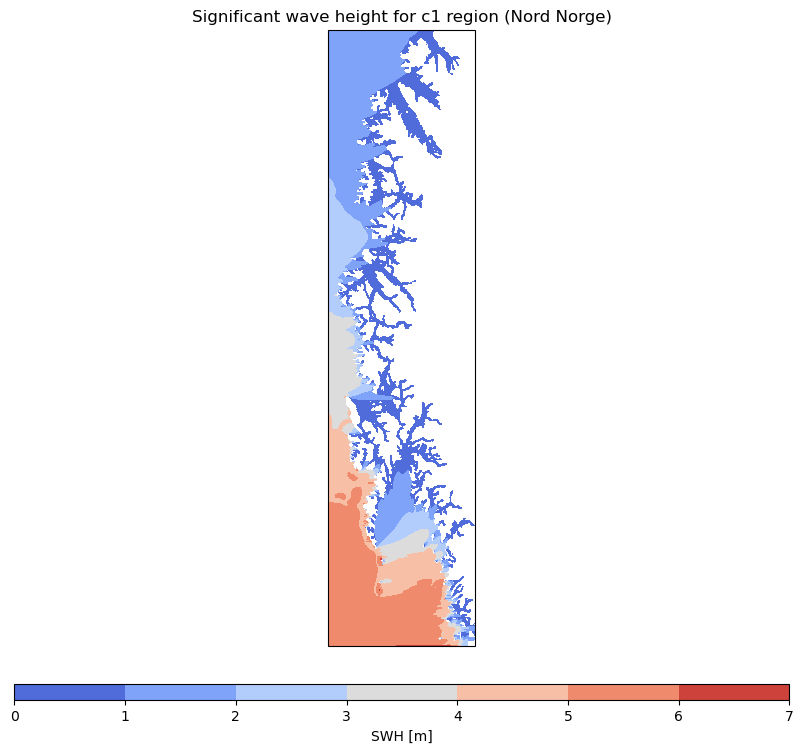

In [6]:
proj_coord = parse_proj_4_string(ds.projection_3.proj4)
oblique_proj = ccrs.ObliqueMercator(
    central_longitude=proj_coord['lon_0'],
    central_latitude=proj_coord['o_lat_p'])
globe=ccrs.Globe(semimajor_axis=proj_coord['R'])
hs_swell = ds.isel(time=0)['hs_swell']
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=oblique_proj)
ax.set_title("Significant wave height for c1 region (Nord Norge)")
contour = ax.contourf(ds.rlon, ds.rlat, hs_swell, cmap='coolwarm')
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('SWH [m]')